# Topic 5 - Which animal gave us SARS?
## Secondary Title: Evolutionary Tree Construction

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

## Learning Outcomes
* Understand evolutionary trees and their uses in biology
* Apply, analyze, and evaluate evolutionary tree algorithms

## Ice breaker

What's your favorite hobby picked up during the pandemic?

# Fastest Outbreak?

## SARS crosses Pacific Ocean within a week
* Feb 21, 2003 - Chinese doctor Liu Jianlu flys to Hong Kong to attend a wedding
* Two weeks later Dr. Liu Jianlu dies but tells doctors that he recently treated sick patients in Guangdong Province
* Feb 23, 2003 - Man staying across the hall from Liu Jianlu travels to Hanoi and dies after infecting 80 people
* Feb 26, 2003 - Woman traveled home to Toronto bringing the disease and initiating an outbreak there.

* It took 5 years for the Black Death to travel from Constantinople to Kiev
* It took HIV two decades to circle the global

## Reaction
The reaction was immense with Chinese officials threatening to execute infected patients who violated quarantine.

If international travel spread the disease then international collaboration would contain it.

Within weeks bioligists identified a virus that caused the epdemic and sequences the genome. The new disease earned the name Severe Acute Respiratory Syndrome or SARS

<a href="https://theconversation.com/the-mysterious-disappearance-of-the-first-sars-virus-and-why-we-need-a-vaccine-for-the-current-one-but-didnt-for-the-other-137583">Article on SARS and COVID19</a>

## Evolution of SARS
* SARS belongs to a family of viruses called conoraviruses (named after latin word *corona* meaning crown)
* Before SARS the coronaviruses were thought to only cause minor problems like the common cold

<table>
    <tr>
        <td>
            <img src="http://bioinformaticsalgorithms.com/images/Evolution/coronavirus.png" width=200>
        </td>
        <td>
            <img src="http://bioinformaticsalgorithms.com/images/Evolution/eclipse.png" width=200>
        </td>
    </tr>
    </table>

## Sequencing
* By fall 2003, researchers sequenced many strains from patients in various contries
* OK ... so we keep talking about sequencing...
<center>
<img src="https://www.genengnews.com/wp-content/uploads/2018/10/Aug23_GEN_Baker_NGSChallenges_GettyImages537618080_ktsimage_DNATestSangerSeq2004017011.jpg" width=400>
</center>
* <a href="https://www.youtube.com/watch?v=zBPKj0mMcDg&ab_channel=ThermoFisherScientific">But what are some modern ways to do sequencing?</a>

## Questions
* How did SARS-CoV cross the species barrier to humans? 
* When and where did it happen? How did SARS spread around the world, and who infected whom?

Each of these questions about SARS is ultimately related to the problem of constructing evolutionary trees (also known as phylogenies). Here is an evolutionary tree for HIV, but what algorithms do we use for this?

<img src="http://bioinformaticsalgorithms.com/images/Evolution/HIV_phylogeny.png" width=500>

Our weekly injection of biology from a biologist :)

Let's watch this video and try to answer:
1. What is cladistics?
2. What is parsimony?
3. Do we compare the whole genome or part of it? Why or why not?
4. What do we use ancestoral genes?
5. Is it one size algorithm fits all?

<a href="https://calpoly.zoom.us/rec/share/hY2IiOUQZlOwwt54utQtXUuwdIcWsERw_ylxc48HcNT-BZ4VhxPwWCueNA1hLAzB.1Fhte5u1Cs-Kn4-2">Dr. Jean Davidson Video</a> Passcode: q$20al&M

# Distance Matrices to Evolutionary Trees
* Scientists started sequencing cornonavirus from various species to determine which is most similar to SARS
* Comparing (multiple alignment) of entire viral genomes is tricky because viral genes are often rearranged, inserted, and deleted
* Scientists focused on one of six genes in SARS-CoV
* Gene that encodes Spike protein
    * Identifies and binds to receptor site on host's cell membrane
    * Spike protein is 1,255 amino acids long and rather weak similarity with Spike proteins in other coronaviruses
    * Even subtle similarities turned out to be ssufficient for constructing a multiple alignment (comparison) across coronaviruses

## Distance matrix
Consider the DNA sequences shown below for 4 different species. 
<img src="http://bioinformaticsalgorithms.com/images/Evolution/mammal_alignment_distance_matrix.png" width=400>
The above example defined a distance matrix of +1 for every mismatched position. In general, $D$ must satisfy three properties. It must be symmetric (for all $i$ and $j$, $D_{i,j}$ = $D_{j,i}$), non-negative (for all $i$ and $j$, $D_{i,j}$ $\ge$ 0) and satisfy the triangle inequality (for all $i$, $j$, and $k$, $D_{i,j} + D_{j,k} \ge D_{i,k}$ ).

<img src="http://bioinformaticsalgorithms.com/images/Evolution/tree_of_life.png" width=700>

## Rooted trees
<img src="http://bioinformaticsalgorithms.com/images/Evolution/rooted_tree_time.png" width=700>

## What are we aiming for?
We say that a weighted unooted tree $T$ fits a distance matrix $D$ if $d_{i,j}=D_{i,j}$ for every pair of leaves $i$ and $j$. Example:

<img src="http://bioinformaticsalgorithms.com/images/Evolution/additive_distance_matrix.png" width=300>

<img src="http://bioinformaticsalgorithms.com/images/Evolution/simple_tree_fitting_additive_matrix.png" width=300>

## Technical Detour (networkx and pandas): 

``networkx`` is a very useful Python package. It provides a great visualization for many different applications. In your projects you can use other evolutionary tree tools.

In [39]:
%matplotlib inline 

import networkx as nx

G = nx.Graph()

G.add_edge('v1', 'v5', weight=11)
G.add_edge('v2', 'v5', weight=2)
G.add_edge('v5', 'v6', weight=4)
G.add_edge('v6', 'v3', weight=6)
G.add_edge('v6', 'v4', weight=7)

In [40]:
import copy
import pandas as pd

def show(T):
    T = copy.deepcopy(T)
    labels = nx.get_edge_attributes(T,'weight')
    max_value = 0
    for n1,n2 in T.edges():
        if T[n1][n2]['weight'] > max_value:
            max_value = T[n1][n2]['weight']
    for n1,n2 in T.edges():
        T[n1][n2]['weight']=max_value - T[n1][n2]['weight'] + 3
    pos=nx.spring_layout(T)
    nx.draw(T,pos,with_labels=True)
    nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);
    
def show_adj(T):
    if len(T.nodes()) == 0:
        return pd.DataFrame()
    return pd.DataFrame(nx.adjacency_matrix(T).todense(),index=T.nodes(),columns=T.nodes())

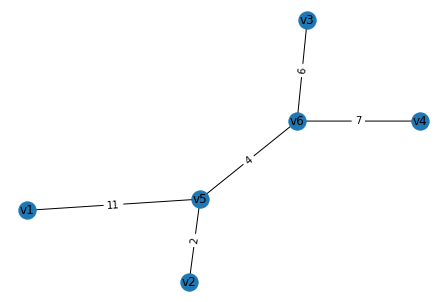

In [41]:
show(G)

In [42]:
show_adj(G)

,v1,v5,v2,v6,v3,v4
v1,0,11,0,0,0,0
v5,11,0,2,4,0,0
v2,0,2,0,0,0,0
v6,0,4,0,0,6,7
v3,0,0,0,6,0,0
v4,0,0,0,7,0,0


## Into the algorithms

## Let's talk about a given graph and neighboring leaves
<br>
<center>
${\color{red}{d_{k,m}}} = \dfrac{({\color{purple}{d_{i,m}}} + {\color{red}{d_{k,m}}}) + ({\color{blue}{d_{j,m}}} + {\color{red}{d_{k,m}}}) - ({\color{purple}{d_{i,m}}} + {\color{blue}{d_{j,m}}})}{2} = \dfrac{d_{i,k} +d_{j,k} - d_{i,j}}{2}$

<img src="http://bioinformaticsalgorithms.com/images/Evolution/neighboring_leaves_equality.png" width=500>
</center>

**Exercise 1** Compute the distances between leaves in a weighted tree

Input: A weighted tree defined by the package networkx

Output: $n \times n$ matrix ($d_{i,j}$), where $d_{i,j}$ is the length of the path between leaves $i$ and $j$.

Learning objectives:
1. Refresh memory of graph traversal (path finding)
2. Understand the difference between $d_{i,j}$ and $D_{i,j}$.
3. Gain exposure and work with networkx python package.

In [43]:
import pandas as pd

def compute_d(G):
    d = {}
    for nodei in G.nodes():
        for nodej in G.nodes():
            d[nodei,nodej] = 0
    # Fill in all adjacent values
    for nodei,nodej,data in G.edges(data=True):
        d[nodei,nodej] = data['weight']
        d[nodej,nodei] = d[nodei,nodej]
    for nodei in G.nodes():
        for nodej in G.nodes():
            if d[nodei,nodej] == 0 and nodei != nodej:
                dij = 0
                ## YOUR SOLUTION HERE
                # networkx has a function to compute simple paths. You can uncomment out the line
                # below in order to see this function working. I'll be reviewing your solutions though
                # and if you don't write this from scratch, then I will consider this an attempt to
                # circumvent the autograder
                #path = list(nx.all_simple_paths(G,nodei,nodej))[0] # get the first simple path
                path = ["v1","v2"] #remove this when you are ready
                a = path[0]
                for b in path[1:]:
                    dij += d[a,b]
                    a = b
                d[nodei,nodej] = dij
                d[nodej,nodei] = dij
    d = pd.DataFrame(d.values(),index=d.keys(),columns=['d']).unstack()
    d.columns = [n for l,n in d.columns]
    return d

compute_d(G)

,v1,v2,v3,v4,v5,v6
v1,0,13,21,22,11,15
v2,13,0,12,13,2,6
v3,21,12,0,13,10,6
v4,22,13,13,0,11,7
v5,11,2,10,11,0,4
v6,15,6,6,7,4,0


## What if you need to find the graph?
<img src="http://bioinformaticsalgorithms.com/images/Evolution/additive_phylogeny.png" width=450>

**Exercise 2** Implement limb length algorightm.

Input: An addititve distance matrix $D$ and a node $j$

Output: The length of the limb connect leaf $j$ to its parent in $Tree(D)$.

Learning outcomes:
1. Understanding why this function is needed when we just computed the paths weights previously.
2. Understanding the Limb Length Theorem in Chapter 7.

In [44]:
import pandas as pd
import numpy as np

def limb(D,j):
    min_length = np.Inf
    nodes = D.drop(j).index
    for ix,i in enumerate(nodes):
        for kx in range(ix+1,len(nodes)):
            k = nodes[kx]
    return min_length

names = ["v1","v2","v3","v4"]
D = pd.DataFrame([[0,13,21,22],[13,0,12,13],[21,12,0,13],[22,13,13,0]],index=names,columns=names)
print(D)
limb(D,"v4")


    v1  v2  v3  v4
v1   0  13  21  22
v2  13   0  12  13
v3  21  12   0  13
v4  22  13  13   0


7.0

## Building up additive phylogeny
One piece at a time... First thing will be to find out where we could insert a noode.

Learning outcomes:
1. Using recursion and by extension debugging recursion
2. Understand additive versus non-additive $D$
3. Constructing our first evolutionary tree

**Exercise 3a** Implement a portion of ``AdditivePhylogeny`` algorithm from Chapter 7.

Input: Distance matrix $D$ and node name $n$.

Output: Return the node names $i,k$ that satisfy $D_{i,k} = D_{i,n} + D_{n,k}$. In other words, where can you insert $n$ back in.

In [45]:
Dorig = copy.copy(D)

In [46]:
def find(D,n):
    nodes = D.drop(n).index
    for ix,i in enumerate(nodes):
        for kx in range(ix+1,len(nodes)):
            # Your solution here
            pass
    return None,None

D = copy.copy(Dorig)
print("Starting D")
print(D)
limbLength = limb(D,D.index[-1]) # our algorithm will choose the last node
n = D.index[-1]
print("Node to remove:",n)
Dtrimmed = D.drop(n).drop(n,axis=1)
for j in Dtrimmed.index:
    D.loc[j,n] = D.loc[j,n] - limbLength
    D.loc[n,j] = D.loc[j,n]
print("New D")
print(D)
print(n)
find(D,n)

Starting D
    v1  v2  v3  v4
v1   0  13  21  22
v2  13   0  12  13
v3  21  12   0  13
v4  22  13  13   0
Node to remove: v4
New D
      v1    v2    v3    v4
v1   0.0  13.0  21.0  15.0
v2  13.0   0.0  12.0   6.0
v3  21.0  12.0   0.0   6.0
v4  15.0   6.0   6.0   0.0
v4


('v1', 'v3')

**Exercise 3b** Implement a portion of ``AdditivePhylogeny`` algorithm from Chapter 7.

Input: Distance matrix $D$ of size $2 \times 2$.

Output: Return a networkx graph with the correct weight.

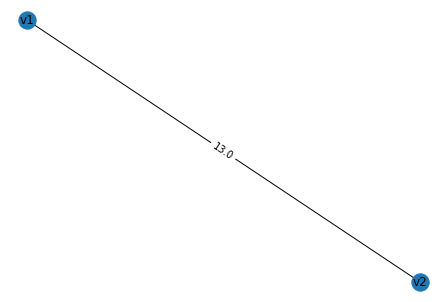

In [47]:
def base_case(D):
    T = nx.Graph()
    ## YOUR SOLUTION HERE
    return T

base_G = base_case(D.iloc[:2,:].iloc[:,:2])
show(base_G)

v3 v1 v2
v4 v1 v3


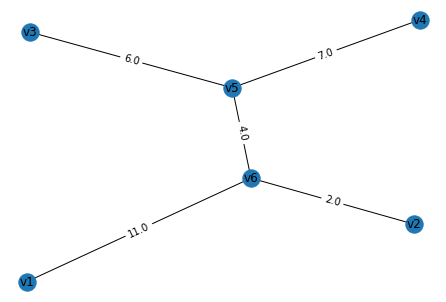

In [48]:
def additive_phylogeny(D,new_number):
    D = D.copy()
    if len(D) == 2:
        return base_case(D) # Implemented correctly above
    n = D.index[-1]
    limbLength = limb(D,n) # our algorithm will choose the last node
    Dtrimmed = D.drop(n).drop(n,axis=1)
    for j in Dtrimmed.index:
        D.loc[j,n] = D.loc[j,n] - limbLength
        D.loc[n,j] = D.loc[j,n]

    Dtrimmed = D.drop(n).drop(n,axis=1)
    T = additive_phylogeny(Dtrimmed,new_number+1)

    i,k = find(D,n) # Implemented correctly above
    print(n,i,k)
    #if D.loc[j,n] < D.loc[i,n]:
    #    i,k = k,i
    v = "v%s"%new_number
    ## Your solution here
    # This is definitely the most complicated thing conceptually
    # You'll need to add edges and remove edges (T.add_edge and T.remove_edge)
    return T

D = copy.copy(Dorig)
G2 = additive_phylogeny(D,len(D)+1)
show(G2)

**Exercise 4.** Run your new algorithm on SARS data derived from multiple alignment of Spike proteins.

In [49]:
import os.path

file = None
locations = ['../data/coronavirus_distance_matrix_additive.txt','../csc-448-student/data/coronavirus_distance_matrix_additive.txt']
for f in locations:
    if os.path.isfile(f):
        file = f
        break
print('Opening',file)
D_sars = pd.read_csv(file,index_col=0)
D_sars

Opening ../data/coronavirus_distance_matrix_additive.txt


,Cow,Pig,Horse,Mouse,Dog,Cat,Turkey,Civet,Human
Cow,0,295,306,497,1081,1091,1003,956,954
Pig,295,0,309,500,1084,1094,1006,959,957
Horse,306,309,0,489,1073,1083,995,948,946
Mouse,497,500,489,0,1092,1102,1014,967,965
Dog,1081,1084,1073,1092,0,818,1056,1053,1051
Cat,1091,1094,1083,1102,818,0,1066,1063,1061
Turkey,1003,1006,995,1014,1056,1066,0,975,973
Civet,956,959,948,967,1053,1063,975,0,16
Human,954,957,946,965,1051,1061,973,16,0


Horse Cow Pig
Mouse Cow Horse
Dog Cow Mouse
Cat Cow Dog
Turkey Cow Dog
Civet Cow Dog
Human Cow Civet


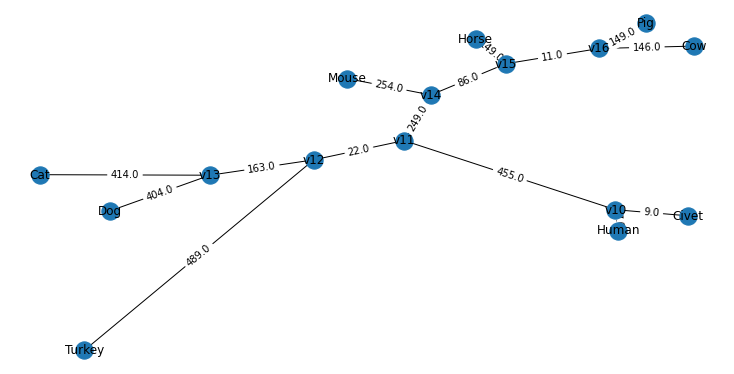

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

G3 = additive_phylogeny(D_sars,len(D_sars)+1)
show(G3)

In [51]:
show_adj(G3)

,Cow,Pig,v16,Horse,v15,Mouse,v14,Dog,v13,Cat,v12,Turkey,v11,Civet,v10,Human
Cow,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pig,0.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v16,146.0,149.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Horse,0.0,0.0,0.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v15,0.0,0.0,11.0,149.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mouse,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v14,0.0,0.0,0.0,0.0,86.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,0.0
Dog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,414.0,163.0,0.0,0.0,0.0,0.0,0.0
Cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Helper function to check things out**

In [52]:
def compute_path_cost(T,i,k):
    cost = 0
    try:
        path = list(nx.all_simple_paths(T,i,k))[0]
    except:
        return -1
    a = path[0]
    cost = 0
    A = show_adj(G3)
    for b in path[1:]:
        cost += A.loc[a,b]
        a = b
    return cost

In [53]:
compute_path_cost(G3,'Human','Turkey')

973.0

In [54]:
compute_path_cost(G3,'Human','Turkey') == D_sars.loc['Human','Turkey']

True

In [55]:
# Don't forget to push!